# CBC Waveform in wavelet domain

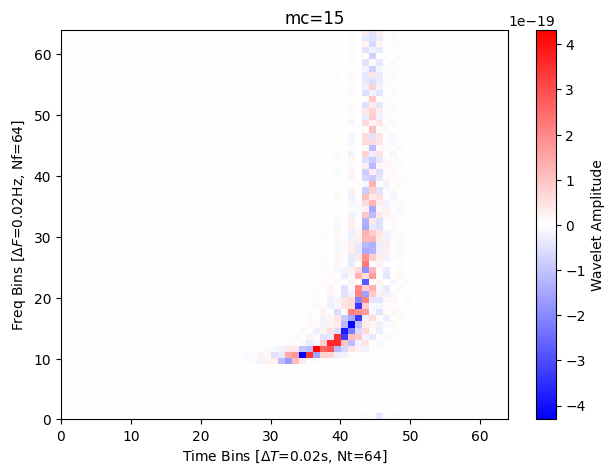

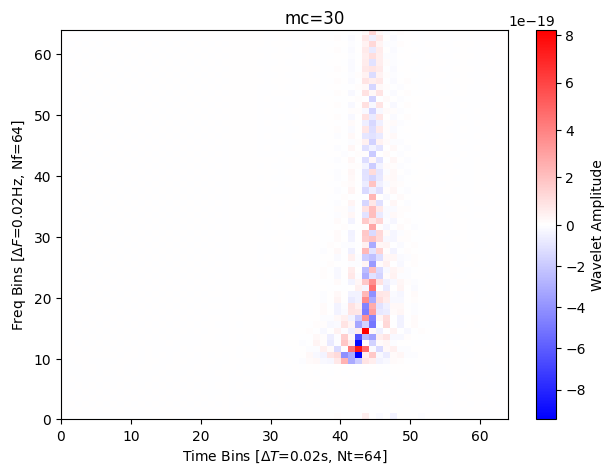

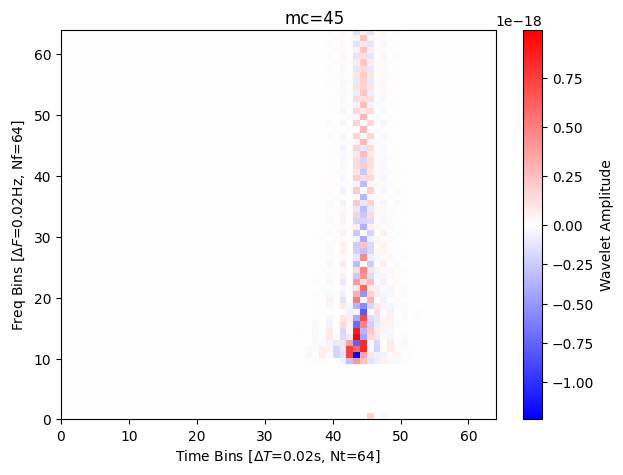

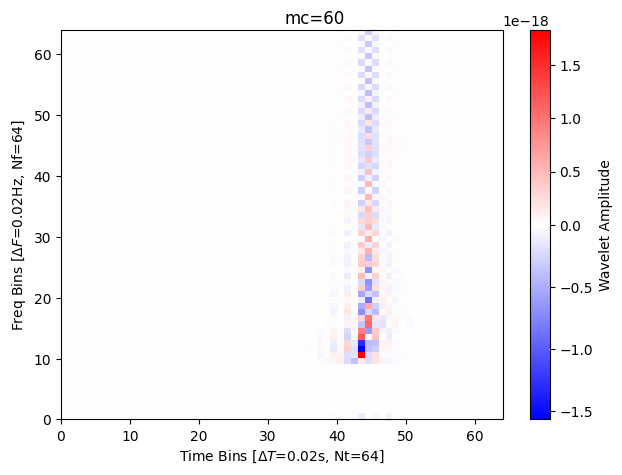

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q
from pywavelet.waveform_generator.generators import FunctionalWaveformGenerator
import matplotlib.colors as colors


def cbc_waveform(mc, q=1, delta_t=1.0 / 4096, f_lower=20):
    m1 = mass1_from_mchirp_q(mc, q)
    m2 = mass2_from_mchirp_q(mc, q)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomD",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=f_lower,

    )
    return hp.sample_times, hp.data


def plot_wavelet_domain_signal(wavelet_data, Nt, Nf):
    fig = plt.figure()
    norm = colors.TwoSlopeNorm(vmin=wavelet_data.min(), vcenter=0, vmax=wavelet_data.max())
    plt.imshow(
        np.rot90(wavelet_data),
        aspect="auto",
        extent=[0, Nt, 0, Nf],
        cmap='bwr',
        norm = norm
    )
    cbar = plt.colorbar()
    cbar.set_label("Wavelet Amplitude")
    plt.xlabel(r"Time Bins [$\Delta T$=" + f"{1 / Nt:.2f}s, Nt={Nt}]")
    plt.ylabel(r"Freq Bins [$\Delta F$=" + f"{1 / Nf:.2f}Hz, Nf={Nf}]")
    # plt.ylim(*freq_range)
    plt.tight_layout()
    return fig


def create_cbc_wavelet_waveform_generator():
    Nf, Nt = 64, 64
    mult = 16
    dt = 1 / 256
    fmin = 20
    hfunc = lambda mc: cbc_waveform(mc, q=1, delta_t=dt, f_lower=fmin)[1]
    # NOTE: Nf * Nt == len(h) returned from h-func
    waveform_generator = FunctionalWaveformGenerator(hfunc, Nf=Nf, Nt=Nt, mult=mult)
    return waveform_generator


wavelet_generator = create_cbc_wavelet_waveform_generator()
Nf, Nt = wavelet_generator.Nf, wavelet_generator.Nt
for i, mc in enumerate([15, 30, 45, 60]):
    wavelet_matrix = wavelet_generator(mc=mc)
    fig = plot_wavelet_domain_signal(wavelet_matrix, Nf, Nt)
    fig.suptitle(f"mc={mc}")
    fig.show()